# Kernel Principal Component Analysis (K-PCA) 

Non-linear dimensionality reduction through the use of kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### K-PCA from Scratch

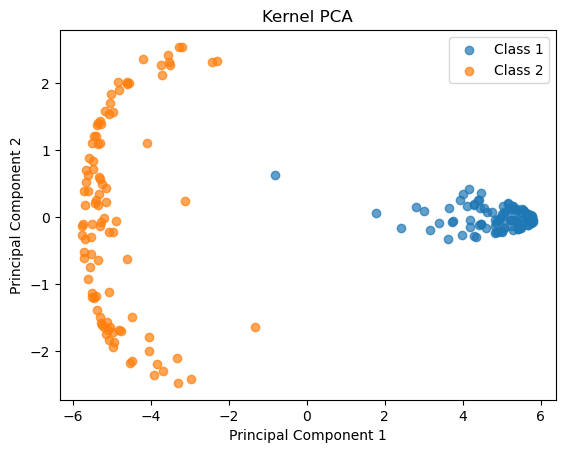

In [8]:
def gaussian_rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

def center_kernel_matrix(kernel_matrix):
    n = kernel_matrix.shape[0]

    # Row centering
    row_means = np.mean(kernel_matrix, axis=1, keepdims=True)
    centered_rows = kernel_matrix - row_means

    # Column centering
    col_means = np.mean(centered_rows, axis=0, keepdims=True)
    centered_kernel_matrix = centered_rows - col_means

    # Overall centering
    total_mean = np.mean(centered_kernel_matrix)
    centered_kernel_matrix += total_mean

    return centered_kernel_matrix

def kpca(X, num_components=2, gamma=1.0):
    # Compute the kernel matrix
    kernel_matrix = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            kernel_matrix[i, j] = gaussian_rbf_kernel(X[i], X[j], gamma)

    # Center the kernel matrix
    centered_kernel_matrix = center_kernel_matrix(kernel_matrix)

    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(centered_kernel_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the principal components
    projected_data = centered_kernel_matrix.dot(principal_components)

    return projected_data

# Example usage
# Generate a toy dataset with two classes
np.random.seed(42)
class_1 = np.random.multivariate_normal([3, 3], [[1, 0.5], [0.5, 1]], 100)
class_2 = np.random.multivariate_normal([7, 7], [[1, -0.5], [-0.5, 1]], 100)
data = np.concatenate((class_1, class_2), axis=0)

# Apply KPCA
kpca_result = kpca(data, num_components=2, gamma=0.1)

# Plot the results
plt.scatter(kpca_result[:100, 0], kpca_result[:100, 1], label='Class 1', alpha=0.7)
plt.scatter(kpca_result[100:, 0], kpca_result[100:, 1], label='Class 2', alpha=0.7)
plt.title('Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### K-PCA from Sklearn

In [3]:
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#### Example - Separating Half moons 

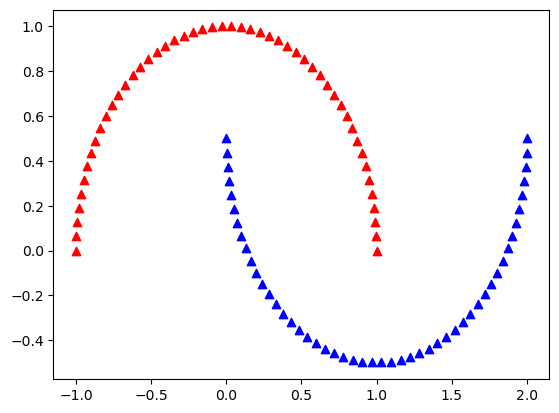

In [4]:
# 1. Generate nonlinear data in the shape of half moons 
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0, 1], c='r', marker='^')
plt.scatter(X[y==1,0], X[y==1, 1], c='b', marker='^')
plt.show()

Clearly, these two half-moon shapes are not linearly separable and our goal is to unfold the half-moons via kernel PCA so that the dataset can serve as a suitable input for a linear classifier.


### PCA

In the right subplot, we shifted the triangular samples slightly upwards \nand the circular samples slightly downwards to better visualize the class overlap."

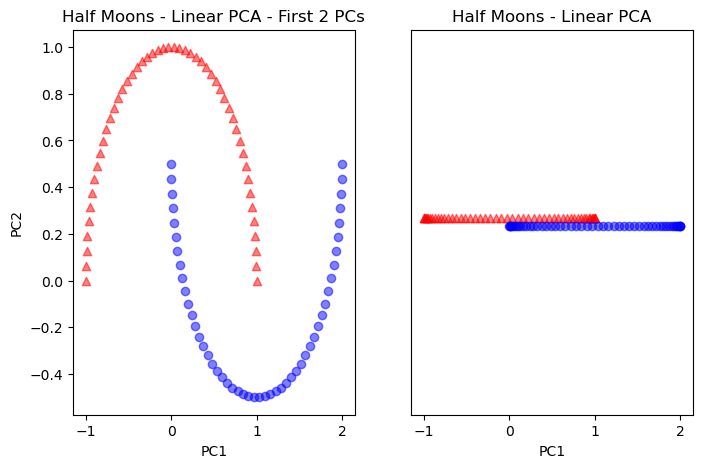

In [5]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,5))

ax[0].scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Half Moons - Linear PCA - First 2 PCs")

ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_title("Half Moons - Linear PCA")
plt.show()

### Kernel PCA 

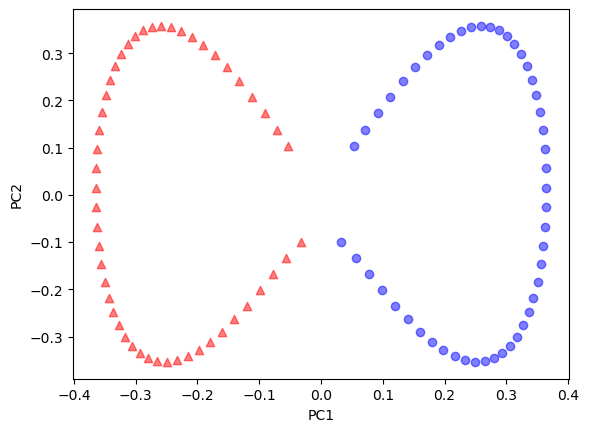

In [6]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()